<h1>Loan Prediction System </h1>

The objective of this project is to develop a system capable of predicting loan approval status, determining whether a loan application will be approved or denied. 

<h1> 1.0 Import libraries </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1> 2.0 Exploring the data </h1>

In [2]:
df = pd.read_csv('Loan Dataset.csv')
df.head()

Applicant_ID  Gender  Age Marital_Status  Dependents     Education  \
0             1  Female   25        Married           2      Graduate   
1             2    Male   36        Married           2   High School   
2             3    Male   43         Single           0  Postgraduate   
3             4  Female   28        Married           0   High School   
4             5  Female   32         Single           0      Graduate   

  Employment_Status Occupation_Type Residential_Status City/Town  ...  \
0          Employed        Business                Own     Urban  ...   
1          Employed        Business                Own  Suburban  ...   
2     Self-Employed      Freelancer                Own     Urban  ...   
3     Self-Employed      Freelancer               Rent  Suburban  ...   
4          Employed        Salaried               Rent  Suburban  ...   

   Loan_Amount_Requested  Loan_Term  Loan_Purpose  Interest_Rate  Loan_Type  \
0                  24535        209          Home           4.27    Secured   
1                   8288         33          Home          14.78  Unsecured   
2                  10308        159       Vehicle          12.33    Secured   
3                  33937         39      Personal           8.77    Secured   
4                  23360         34          Home           9.04  Unsecured   

   Co-Applicant  Bank_Account_History  Transaction_Frequency  Default_Risk  \
0           Yes                     8                     20          0.81   
1           Yes                     9                      9          0.17   
2           Yes                     7                     27          0.25   
3            No                     9                     16          0.27   
4            No                     1                     17          0.32   

  Loan_Approval_Status  
0                    1  
1                    0  
2                    0  
3                    1  
4                    1  

[5 rows x 27 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Applicant_ID                52000 non-null  int64  
 1   Gender                      52000 non-null  object 
 2   Age                         52000 non-null  int64  
 3   Marital_Status              52000 non-null  object 
 4   Dependents                  52000 non-null  int64  
 5   Education                   52000 non-null  object 
 6   Employment_Status           52000 non-null  object 
 7   Occupation_Type             52000 non-null  object 
 8   Residential_Status          52000 non-null  object 
 9   City/Town                   52000 non-null  object 
 10  Annual_Income               52000 non-null  int64  
 11  Monthly_Expenses            52000 non-null  int64  
 12  Credit_Score                52000 non-null  int64  
 13  Existing_Loans              520

In [4]:
df.dtypes

Applicant_ID                    int64
Gender                         object
Age                             int64
Marital_Status                 object
Dependents                      int64
Education                      object
Employment_Status              object
Occupation_Type                object
Residential_Status             object
City/Town                      object
Annual_Income                   int64
Monthly_Expenses                int64
Credit_Score                    int64
Existing_Loans                  int64
Total_Existing_Loan_Amount      int64
Outstanding_Debt                int64
Loan_History                    int64
Loan_Amount_Requested           int64
Loan_Term                       int64
Loan_Purpose                   object
Interest_Rate                 float64
Loan_Type                      object
Co-Applicant                   object
Bank_Account_History            int64
Transaction_Frequency           int64
Default_Risk                  float64
Loan_Approva

In [5]:
df.shape

(52000, 27)

In [6]:
df.describe()

Applicant_ID           Age    Dependents  Annual_Income  \
count  52000.000000  52000.000000  52000.000000   52000.000000   
mean   26000.500000     38.898385      1.498000   83588.474404   
std    15011.251336     10.553928      1.118077   35720.851522   
min        1.000000     18.000000      0.000000   20009.000000   
25%    13000.750000     31.000000      0.000000   55564.000000   
50%    26000.500000     38.000000      1.000000   78839.000000   
75%    39000.250000     45.000000      2.000000  114226.000000   
max    52000.000000     69.000000      3.000000  149998.000000   

       Monthly_Expenses  Credit_Score  Existing_Loans  \
count      52000.000000  52000.000000    52000.000000   
mean        2748.064885    678.089019        0.997865   
std         1295.678763    159.990367        0.815586   
min          500.000000    300.000000        0.000000   
25%         1636.000000    553.000000        0.000000   
50%         2739.000000    742.000000        1.000000   
75%         3866.000000    796.000000        2.000000   
max         4999.000000    849.000000        2.000000   

       Total_Existing_Loan_Amount  Outstanding_Debt  Loan_History  \
count                52000.000000      52000.000000  52000.000000   
mean                 24939.087962      14984.864923      0.198596   
std                  14407.886552       8663.404305      0.398947   
min                      0.000000          0.000000      0.000000   
25%                  12498.000000       7511.750000      0.000000   
50%                  24964.000000      14984.500000      0.000000   
75%                  37399.500000      22432.250000      0.000000   
max                  49999.000000      29998.000000      1.000000   

       Loan_Amount_Requested     Loan_Term  Interest_Rate  \
count           52000.000000  52000.000000   52000.000000   
mean            21102.765481    125.827019       9.253494   
std              8224.940906     65.509959       3.318356   
min              5000.000000     12.000000       3.500000   
25%             16941.750000     69.000000       6.400000   
50%             21039.000000    126.000000       9.240000   
75%             25809.000000    182.000000      12.140000   
max             44848.000000    239.000000      15.000000   

       Bank_Account_History  Transaction_Frequency  Default_Risk  \
count          52000.000000           52000.000000  52000.000000   
mean               4.503923              17.031808      0.500204   
std                2.872721               7.212011      0.289939   
min                0.000000               5.000000      0.000000   
25%                2.000000              11.000000      0.250000   
50%                5.000000              17.000000      0.500000   
75%                7.000000              23.000000      0.750000   
max                9.000000              29.000000      1.000000   

       Loan_Approval_Status  
count          52000.000000  
mean               0.641654  
std                0.479519  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

<h1> 3.0 Data Preprocessing </h1>

<h2> 3.1 Handling Missing Value </h2>

In [7]:
df.isnull().sum()

Applicant_ID                  0
Gender                        0
Age                           0
Marital_Status                0
Dependents                    0
Education                     0
Employment_Status             0
Occupation_Type               0
Residential_Status            0
City/Town                     0
Annual_Income                 0
Monthly_Expenses              0
Credit_Score                  0
Existing_Loans                0
Total_Existing_Loan_Amount    0
Outstanding_Debt              0
Loan_History                  0
Loan_Amount_Requested         0
Loan_Term                     0
Loan_Purpose                  0
Interest_Rate                 0
Loan_Type                     0
Co-Applicant                  0
Bank_Account_History          0
Transaction_Frequency         0
Default_Risk                  0
Loan_Approval_Status          0
dtype: int64

There are no missing values.

<h2> 3.2 Handling Duplicate Values </h2>

In [8]:
print("Total duplicated rows: ", sum(df.duplicated()))

Total duplicated rows:  0


There are no duplicated values.

<h1> 4.0 Exploratory Data Analysis (EDA)</h1>

<h2> 4.1 Feature Engineering</h2>

In [9]:
df = pd.DataFrame(df)

# Convert 'Gender' to binary: Male = 1, Female = 0
df['Gender'] = df['Gender'].map({"Male": 1, "Female": 0})

# Convert 'Loan_Type' to binary: Secured = 1, Unsecured = 0
df['Loan_Type'] = df['Loan_Type'].map({"Secured": 1, "Unsecured": 0})

# Convert 'Co-Applicant' to binary: Yes = 1, No = 0
df['Co-Applicant'] = df['Co-Applicant'].map({"Yes": 1, "No": 0})

df.head()

Applicant_ID  Gender  Age Marital_Status  Dependents     Education  \
0             1       0   25        Married           2      Graduate   
1             2       1   36        Married           2   High School   
2             3       1   43         Single           0  Postgraduate   
3             4       0   28        Married           0   High School   
4             5       0   32         Single           0      Graduate   

  Employment_Status Occupation_Type Residential_Status City/Town  ...  \
0          Employed        Business                Own     Urban  ...   
1          Employed        Business                Own  Suburban  ...   
2     Self-Employed      Freelancer                Own     Urban  ...   
3     Self-Employed      Freelancer               Rent  Suburban  ...   
4          Employed        Salaried               Rent  Suburban  ...   

   Loan_Amount_Requested  Loan_Term  Loan_Purpose  Interest_Rate  Loan_Type  \
0                  24535        209          Home           4.27          1   
1                   8288         33          Home          14.78          0   
2                  10308        159       Vehicle          12.33          1   
3                  33937         39      Personal           8.77          1   
4                  23360         34          Home           9.04          0   

   Co-Applicant  Bank_Account_History  Transaction_Frequency  Default_Risk  \
0             1                     8                     20          0.81   
1             1                     9                      9          0.17   
2             1                     7                     27          0.25   
3             0                     9                     16          0.27   
4             0                     1                     17          0.32   

  Loan_Approval_Status  
0                    1  
1                    0  
2                    0  
3                    1  
4                    1  

[5 rows x 27 columns]

In [10]:
df['Gender'].value_counts()

Gender
1    26011
0    25989
Name: count, dtype: int64

In [11]:
df['Loan_History'].value_counts()

Loan_History
0    41673
1    10327
Name: count, dtype: int64

In [12]:
df['Loan_Type'].value_counts()

Loan_Type
1    26097
0    25903
Name: count, dtype: int64

In [13]:
df['Co-Applicant'].value_counts()

Co-Applicant
0    26036
1    25964
Name: count, dtype: int64

<h2> 4.2 One-Hot Encoding </h2>
Here, we perform one-hot encoding for the categorical columns. This helps transform categorical variables into a numerical format by creating binary columns for each category. One-hot encoding ensures that the model can interpret these variables correctly without assuming any ordinal relationship, which is important for machine learning models that require numerical inputs. This transformation also prevents the model from misinterpreting categorical data as continuous data, maintaining the integrity of the information.

In [14]:
categorical_columns =  df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [15]:
df.columns

Index(['Applicant_ID', 'Gender', 'Age', 'Dependents', 'Annual_Income',
       'Monthly_Expenses', 'Credit_Score', 'Existing_Loans',
       'Total_Existing_Loan_Amount', 'Outstanding_Debt', 'Loan_History',
       'Loan_Amount_Requested', 'Loan_Term', 'Interest_Rate', 'Loan_Type',
       'Co-Applicant', 'Bank_Account_History', 'Transaction_Frequency',
       'Default_Risk', 'Loan_Approval_Status', 'Marital_Status_Married',
       'Marital_Status_Single', 'Education_High School',
       'Education_Postgraduate', 'Employment_Status_Self-Employed',
       'Employment_Status_Unemployed', 'Occupation_Type_Freelancer',
       'Occupation_Type_Professional', 'Occupation_Type_Salaried',
       'Residential_Status_Own', 'Residential_Status_Rent',
       'City/Town_Suburban', 'City/Town_Urban', 'Loan_Purpose_Home',
       'Loan_Purpose_Personal', 'Loan_Purpose_Vehicle'],
      dtype='object')

In [16]:
df.dtypes

Applicant_ID                         int64
Gender                               int64
Age                                  int64
Dependents                           int64
Annual_Income                        int64
Monthly_Expenses                     int64
Credit_Score                         int64
Existing_Loans                       int64
Total_Existing_Loan_Amount           int64
Outstanding_Debt                     int64
Loan_History                         int64
Loan_Amount_Requested                int64
Loan_Term                            int64
Interest_Rate                      float64
Loan_Type                            int64
Co-Applicant                         int64
Bank_Account_History                 int64
Transaction_Frequency                int64
Default_Risk                       float64
Loan_Approval_Status                 int64
Marital_Status_Married                bool
Marital_Status_Single                 bool
Education_High School                 bool
Education_P

We can observed that 16 new columns are created based on the type of marital status, education, employment status, occupation, residential status, city/town, and loan purpose.

<h2> 4.3 Drop unnessary column </h2>

In [17]:
columns_drop = [
    'Applicant_ID',          
    'Transaction_Frequency',
    'Loan_Type',
    'Default_Risk',
]

df = df.drop(columns=columns_drop)


The columns "Applicant_ID" is just the index of the customer data, hence it is not important for model training and we can drop it. Besides, "Transaction_Frequency" refer to the frequency of financial transactions in the applicant’s bank account. This column can also be dropped since the frequency of transaction does not relate much with the loan approval. Not only that, "Loan_Type" and "Default_Risk" column should also be dropped since it is directly related to our target column, "Loan_Approval_Status" and might cause data leakage and lead to overfitting.

In [18]:
df.columns

Index(['Gender', 'Age', 'Dependents', 'Annual_Income', 'Monthly_Expenses',
       'Credit_Score', 'Existing_Loans', 'Total_Existing_Loan_Amount',
       'Outstanding_Debt', 'Loan_History', 'Loan_Amount_Requested',
       'Loan_Term', 'Interest_Rate', 'Co-Applicant', 'Bank_Account_History',
       'Loan_Approval_Status', 'Marital_Status_Married',
       'Marital_Status_Single', 'Education_High School',
       'Education_Postgraduate', 'Employment_Status_Self-Employed',
       'Employment_Status_Unemployed', 'Occupation_Type_Freelancer',
       'Occupation_Type_Professional', 'Occupation_Type_Salaried',
       'Residential_Status_Own', 'Residential_Status_Rent',
       'City/Town_Suburban', 'City/Town_Urban', 'Loan_Purpose_Home',
       'Loan_Purpose_Personal', 'Loan_Purpose_Vehicle'],
      dtype='object')

<h1>5.0 Data Visualization & Feature Selection </h1> 

<h2> 5.1 Pearson Correlation Heatmap </h2>

<h3> Top Features Correlation Analysis with Loan Approval Status </h3>
Next, we would plot a quick correlational analysis to examine the relationship between the attributes with our target data, "Loan_Approval_Status" by utilizing a seaborn heatmap.

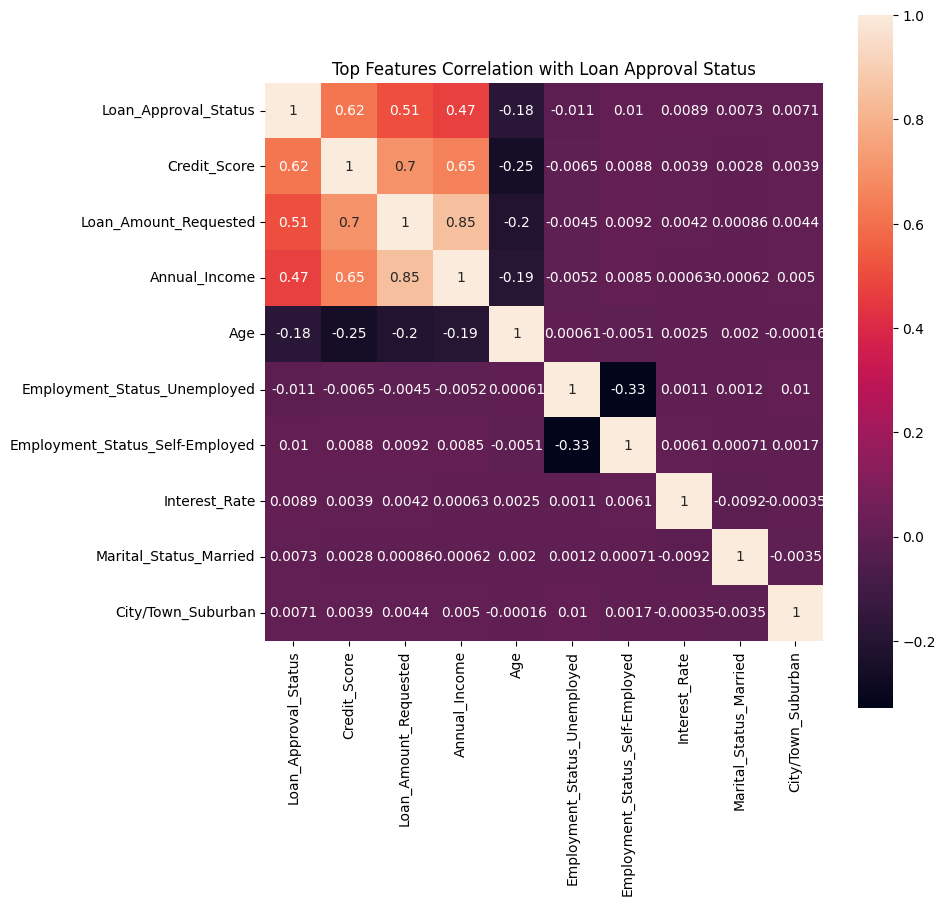

In [19]:
target = 'Loan_Approval_Status'
top_n = 10  

# Get 10 correlations with the target variable
top_features = df.corr()[target].abs().sort_values(ascending=False).head(top_n).index

filtered_corr = df[top_features].corr()

plt.figure(figsize=(9, 9))
sns.heatmap(filtered_corr, annot=True, square=True)
plt.title('Top Features Correlation with Loan Approval Status')
plt.show()


1. Based on the correlation heatmap above, we know that the attributes that has close relationship with our target "Loan_Approval_Status" are Credit_Score, Loan_Amount_Requested, Annual_Income, and Age. Among these 4 variables, except age is negative correlation with "Loan_Approval_Status", others are positive correlation. This means the higher value of Credit_Score, Loan_Amount_Requested and Annual Income, the higher chance of getting loan being approve. While the older the age, the lower chance of getting loan being approve.

2. Compared to education type, occupation type, residential status, and loan purpose, employment status, marital status, and city/town have higher correlation with "Loan_Approval_Status" as their appear in this top 10 features correlation heatmap.

3. There are strong positive correlation between Loan_Amount_Requested and Annual_Income with Credit_Score. 

4. Annual_Income has strong with positive correlation with Loan_Amount_Requested.

5. We also can observe that there is a negative correlation between self-employed and unemployed for employment status.

<h3> Top Features Correlation Analysis with Bank Account History </h3>

In the dataset, Bank_Account_History shows an unclear meaning. It has data ranging from 0 to 9, but we do not know whether it reflects the number of bank accounts the applicant has had before or if it is a rating related to their transaction history. To understand the importance of this feature in the dataset and its role in our loan prediction model, we want to identify whether it has any correlation with other attributes. By doing so, we can identify whether it influences any key factors. 

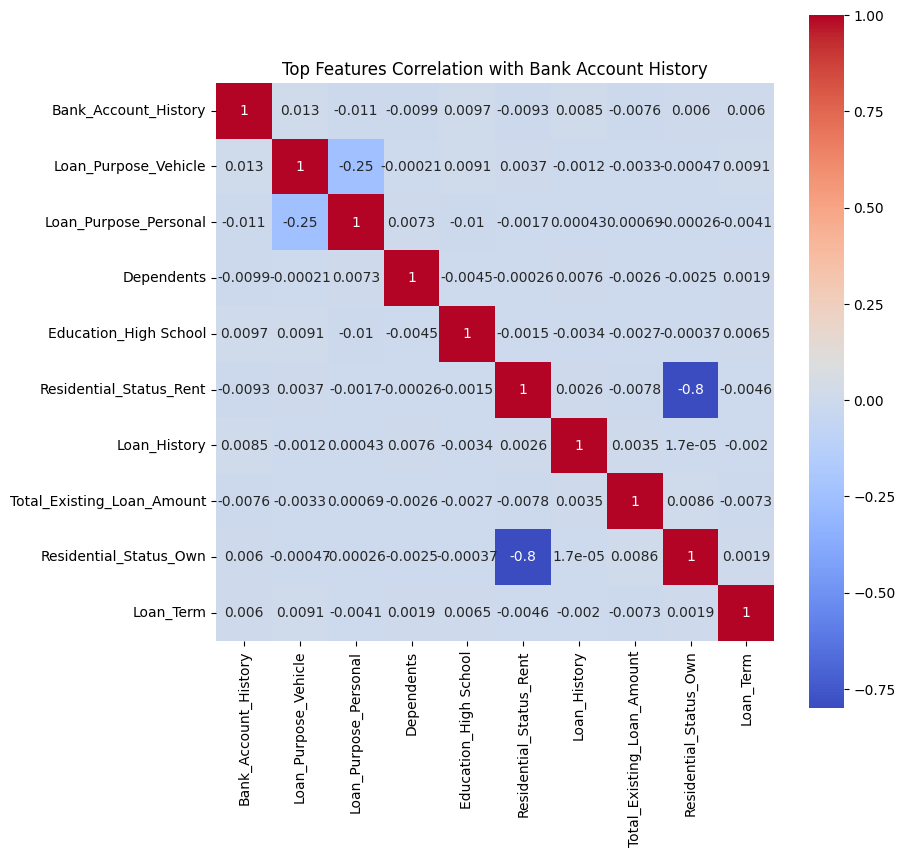

In [20]:
target = 'Bank_Account_History'
top_n = 10  

# Get 10 correlations with the bank account history
top_features = df.corr()[target].abs().sort_values(ascending=False).head(top_n).index

filtered_corr = df[top_features].corr()

plt.figure(figsize=(9, 9))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Top Features Correlation with Bank Account History')
plt.show()


Based on the heatmap, the Bank_Account_History feature does not have any strong correlations with other columns. Its correlations with the other features are all around 0.00, indicating very weak relationships. This suggests that Bank_Account_History may not be a critical predictor in determining the loan approval status. We will continue confirming this using box plot later on.

<h2> 5.2 Kernel Density Estimate (KDE) Plot </h2>
We use KDE plot to observe the continuous numerical attributes data distribution 

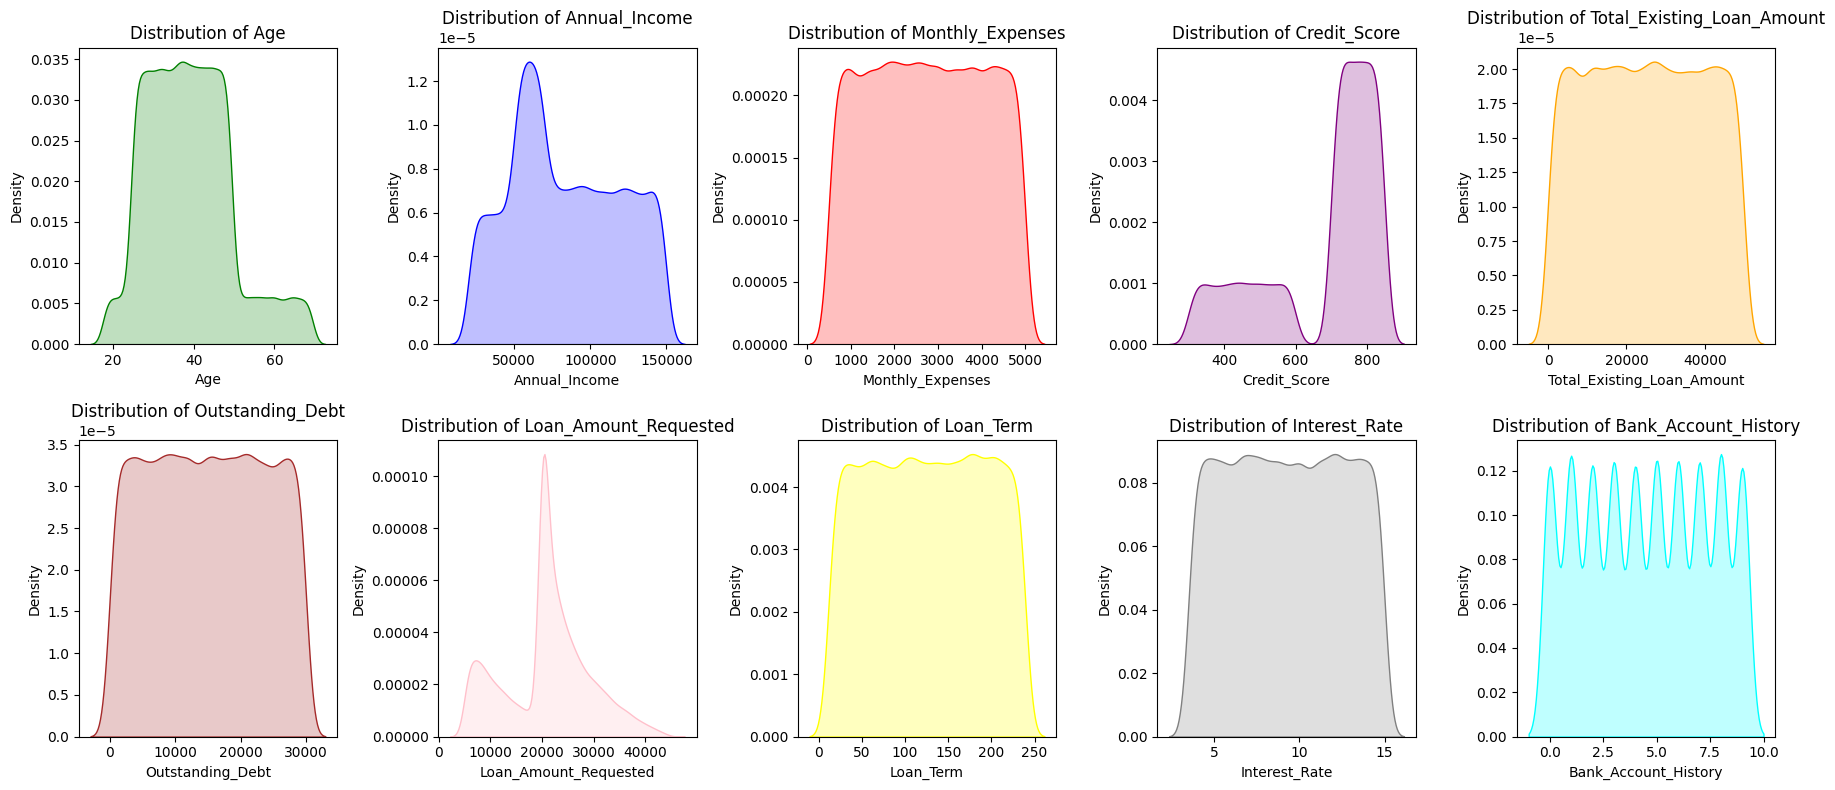

In [21]:
# List of continuous variables
continuous_variables = ['Age', 'Annual_Income', 'Monthly_Expenses', 'Credit_Score', 
                        'Total_Existing_Loan_Amount', 'Outstanding_Debt', 'Loan_Amount_Requested', 
                        'Loan_Term', 'Interest_Rate', 'Bank_Account_History']

def kdeplot(variable, color, ax):
    ax.set_title(f'Distribution of {variable}')
    
    if variable in continuous_variables:
        sns.kdeplot(df[variable], fill=True, color=color, ax=ax)  
    else:
        ax.set_visible(False)  

fig, ax = plt.subplots(2, 5, figsize=(18, 8))
ax = ax.flatten()

colors = ['green', 'blue', 'red', 'purple', 'orange', 'brown', 'pink', 'yellow', 'grey', 'cyan']

for i, (variable, color) in enumerate(zip(continuous_variables, colors)):
    kdeplot(variable, color, ax[i])

plt.tight_layout()
plt.show()


From the visualizations above, we could observe that:
1. Age, Annual_Income, and Loan_Amount_Requested are right skewed.
2. Monthly_Expenses, Total_Existing_Loan_Amount, Outstanding_Debt, Loan_Term, Interest_Rate, and Bank_Account_History are uniform distributions.
3. Credit_Score is left skewed.

<h2> 5.3 Box Plot </h2>
<h3> Determining Outliers and Summaries </h3>
We use boxplot to observe if there are any outliers, and also the summaries of the numerical columns.

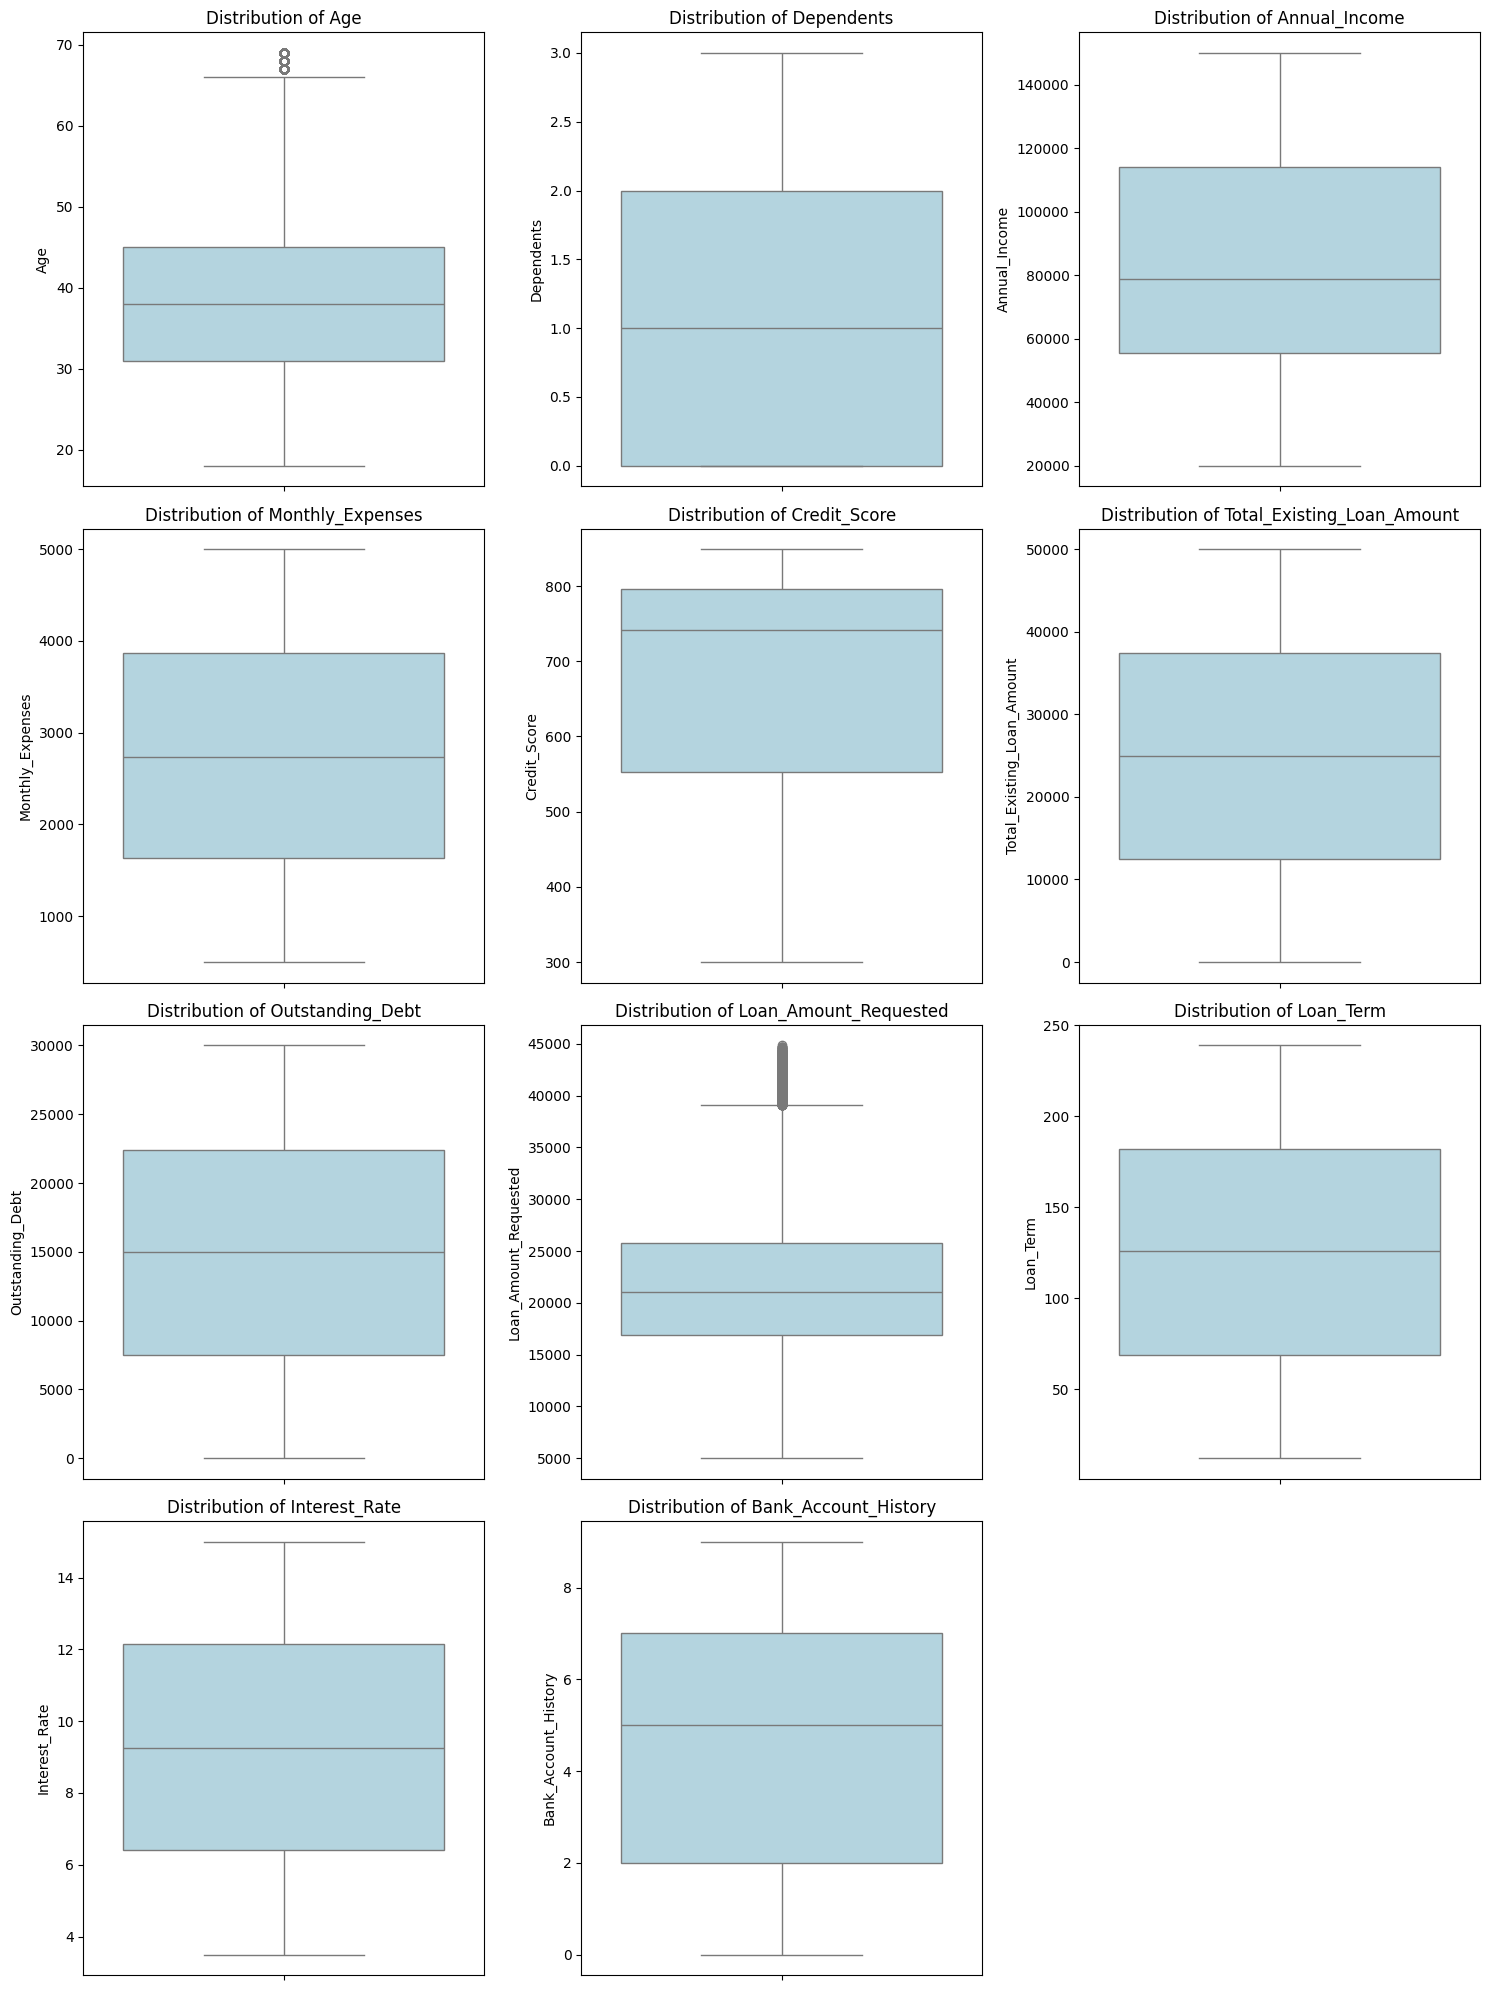

In [22]:
num_columns = [
    "Age", "Dependents", "Annual_Income", "Monthly_Expenses", 
    "Credit_Score", "Total_Existing_Loan_Amount", "Outstanding_Debt", 
    "Loan_Amount_Requested", "Loan_Term", "Interest_Rate", 
    "Bank_Account_History"
]

num = len(num_columns)
nrows = (num + 2) // 3 
ncols = 3  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

axes = axes.flatten()


def boxplot(variable, axes, color):
    if df[variable].dtype in ['float64', 'int64']:
        sns.boxplot(y=variable, data=df, ax=axes, color=color)
        axes.set_title(f'Distribution of {variable}')
    else:
        sns.boxplot(x=variable, data=df, ax=axes, color=color)
        axes.set_title(f'Distribution of {variable}')

for i, column in enumerate(num_columns):
    boxplot(column, axes[i], color='lightblue') 

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Based on the boxplots above, we can observe there are outliers in age and loan amount requested. However, we do not remove these outliers because they are in possible range. 

<h3> Determining Distribution of Top 4 Features with Loan Approval Status </h3>
We now look into the distribution of Credit_Score, Loan_Amount_Requested, Annual_Income, and Age grouped with Loan_Approval_Status since these are the attributes that has strong relationship with Loan_Approval_Status

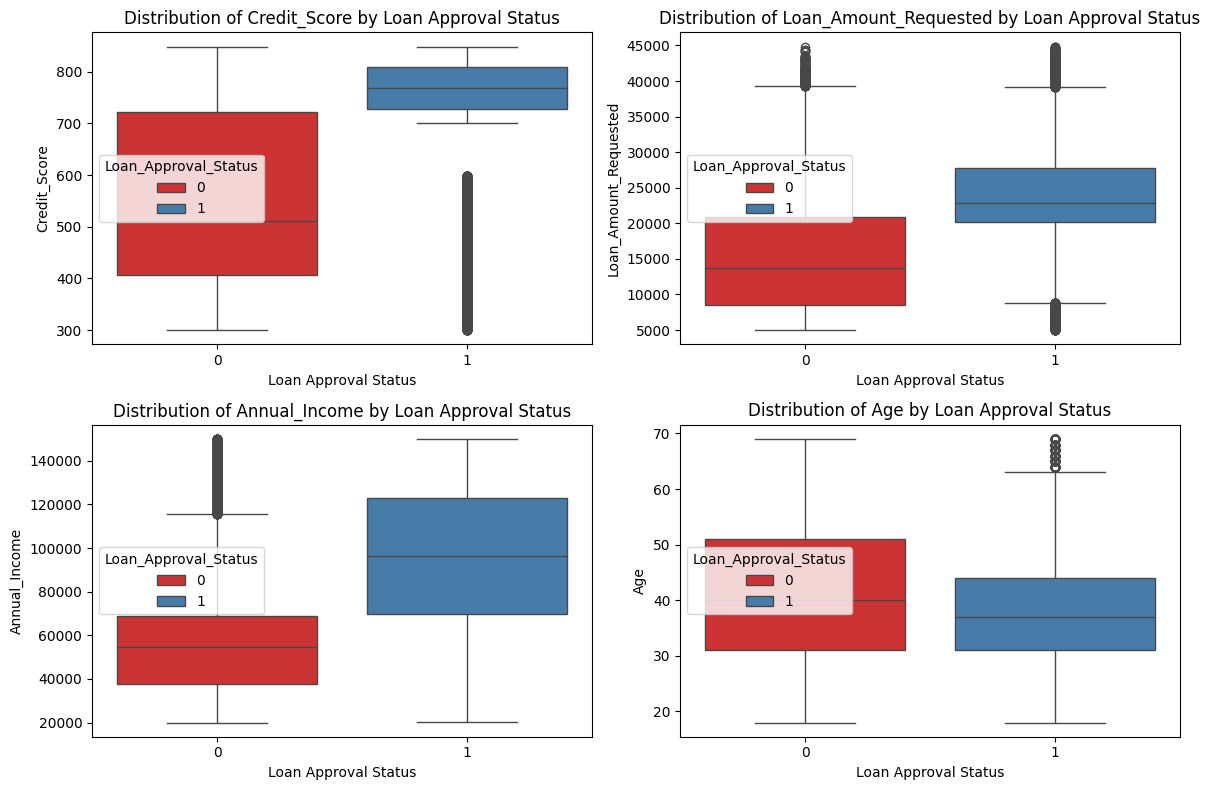

In [23]:
top_variables = ['Credit_Score', 'Loan_Amount_Requested', 'Annual_Income', 'Age']

plt.figure(figsize=(12, 8))

for i, variable in enumerate(top_variables, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(x='Loan_Approval_Status', y=variable, data=df, hue='Loan_Approval_Status', palette='Set1')
    plt.title(f'Distribution of {variable} by Loan Approval Status')
    plt.xlabel('Loan Approval Status')
    plt.ylabel(variable)

plt.tight_layout()
plt.show()


1. From the first boxplot above, we know that with credit score above 700 is more likely for the loan being approved. However, with many extreme records that shows loan can be approved even with credit score lower than 600, it proved that credit score is not the only factor affecting the loan approval status.

2. From the second boxplot, we can see those whose loans were approved have generally requested higher loan amounts, typically above 10000, and with median around 23000. While for those being denied, has requested lower loan amounts, with median around 14000.

3. From the third boxplot, majority of applicants for the loan being approved have higher annual income, where median around 95000. However, there are also a few data that shows applicants' loan with high income are denied.

4. From the forth boxplot, the applicants with old age are more likely to be denied for the loan, especially age older than around 65 years old.

<h3> Determining Bank Account History Distribution in Credit Score </h3>
Since credit score is an important feature that reflects the applicants' creditworthiness, we can identify whether credit score is higher in certain bank account history value.

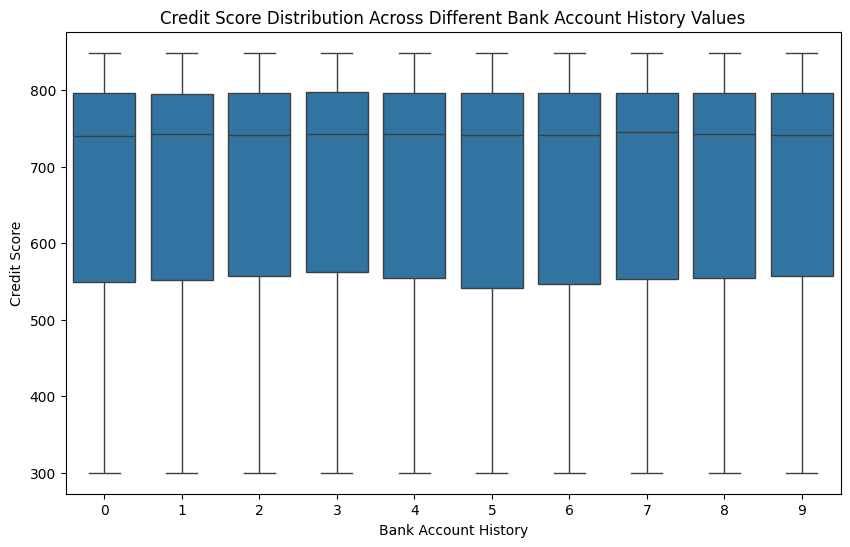

In [24]:
# Box plot for Credit Score based on Bank Account History values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bank_Account_History', y='Credit_Score', data=df)
plt.title('Credit Score Distribution Across Different Bank Account History Values')
plt.xlabel('Bank Account History')
plt.ylabel('Credit Score')
plt.show()


Based on the above boxplot, the credit score value is distributed evenly among the bank account history, with median all around 740. Hence, this prove that bank account history is not something related to creditworthiness.

<h2> 5.4 Bar Chart </h2>
We use bar chart to observe the data distribution for Loan_Approval_Status according to different factors, such as bank account history, marital status, education, employment status, occupation type, residential status, city/town and loan purpose. This is to look into their relationship of the features with our target column, to see if certain values of these features are associated with higher or lower loan approval rates.

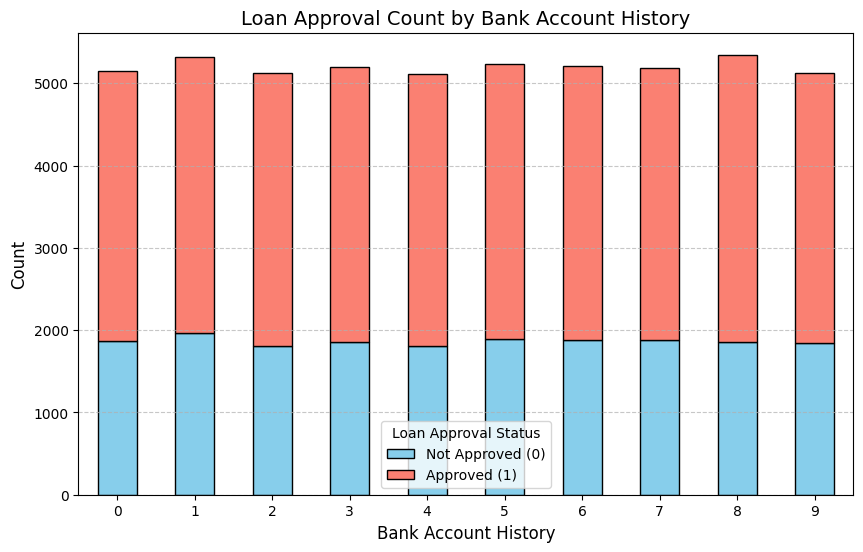

In [25]:
# Group by Bank_Account_History and Target_Variable
grouped_data = df.groupby(['Bank_Account_History', 'Loan_Approval_Status']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Loan Approval Count by Bank Account History", fontsize=14)
plt.xlabel("Bank Account History", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Loan Approval Status", labels=["Not Approved (0)", "Approved (1)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on the stacked bar chart above, we can see there is no clear correlation between Bank_Account_History and Loan_Approval_Status. The numbers of loan being approved and denied are generally distributed among them. This double confirm that the bank account history may not be a strong predictor of the loan approval status in this context.

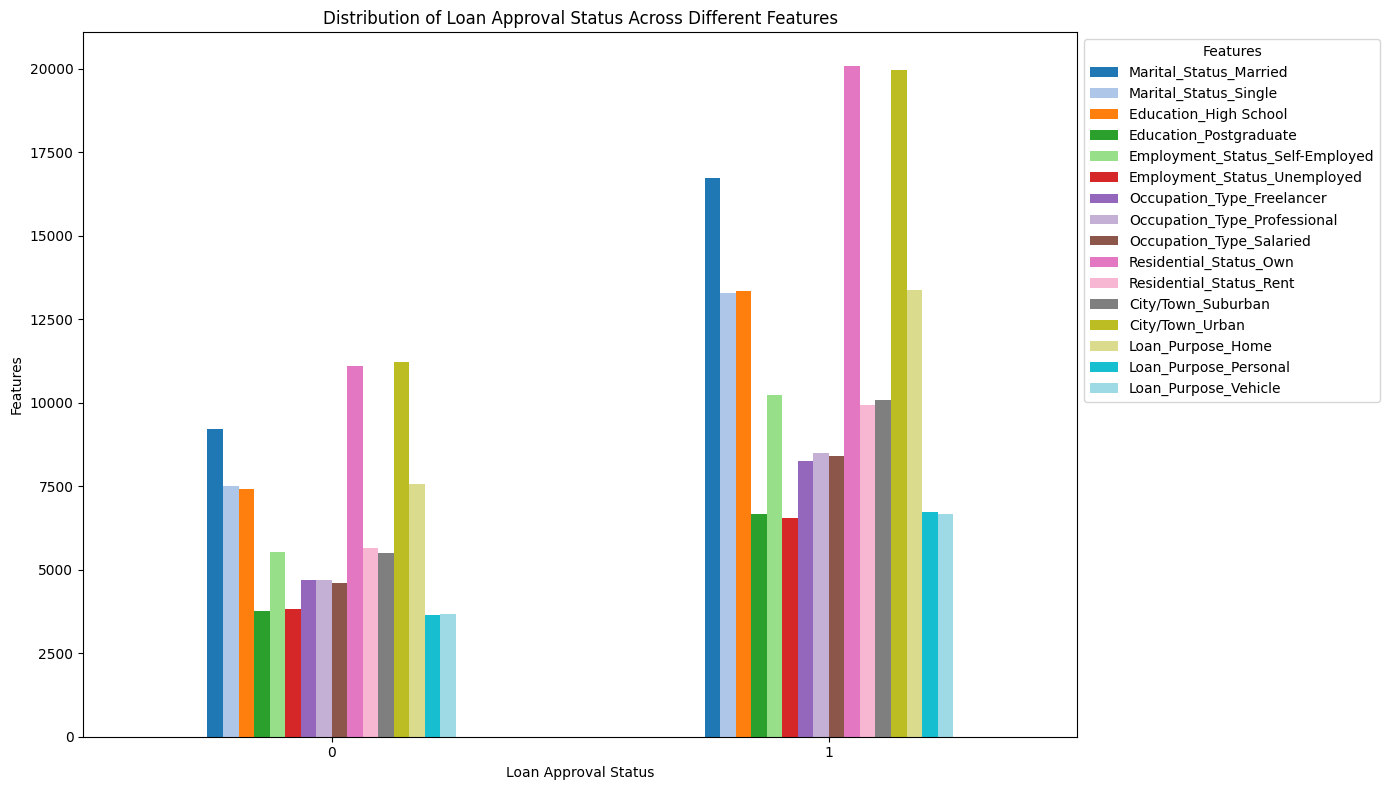

In [26]:
feature_columns = [
    'Marital_Status_Married', 'Marital_Status_Single', 'Education_High School', 
    'Education_Postgraduate', 'Employment_Status_Self-Employed', 'Employment_Status_Unemployed', 
    'Occupation_Type_Freelancer', 'Occupation_Type_Professional', 'Occupation_Type_Salaried', 
    'Residential_Status_Own', 'Residential_Status_Rent', 'City/Town_Suburban', 'City/Town_Urban', 
    'Loan_Purpose_Home', 'Loan_Purpose_Personal', 'Loan_Purpose_Vehicle'
]

summary_data = pd.DataFrame()


for column in feature_columns:
    true_counts = df[df[column] == True].groupby('Loan_Approval_Status').size()
    summary_data[column] = true_counts  

colors = plt.cm.tab20(np.linspace(0, 1, len(feature_columns)))


fig, ax = plt.subplots(figsize=(14, 8))

summary_data.plot(kind='bar', ax=ax, color=colors)

ax.set_title('Distribution of Loan Approval Status Across Different Features')
ax.set_ylabel('Features')
ax.set_xlabel('Loan Approval Status')
ax.set_xticklabels(summary_data.index, rotation=0)

ax.legend(title='Features', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()

plt.show()


Although the number of applicants whose loans are approved is higher than those whose loans are denied, the bar chart reveals that the distribution according to marital status, education, employment status, occupation type, residential status, city/town and loan purpose are almost the same for both loan being denied and approved.

<h2> 5.5 Feature Selection </h2>

The "feature_columns" mentioned above, including marital status, education, employment status, occupation type, residential status, city/town, and loan purpose, appear to have minimal impact on predictions as the distribution for both loan denial and approval is similar across these features. Same for bank account history. Removing them can simplify the model and reduce computational complexity. However, we do not remove them now because we want to compare the result with all columns and after dropping the columns.

<h1> 6.0 Modeling </h1>
<h2> 6.1 Splitting Data </h2>
Now, we will split our data into 80% training set and 20% testing data.

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Loan_Approval_Status'])  
y = df['Loan_Approval_Status'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<h2> 6.2 Handling Imbalance Data </h2>

After splitting the data, we check and handle the imbalance data if exist because imbalance data can affect the model's accuracy.

In [28]:
print("Training set distribution:")
print(y_train.value_counts())

train = (y_train.value_counts() / len(y_train)) * 100

print("\nPercentage distribution:")
print(train.apply(lambda x: f"{x:.2f}%"))


Training set distribution:
Loan_Approval_Status
1    26693
0    14907
Name: count, dtype: int64

Percentage distribution:
Loan_Approval_Status
1    64.17%
0    35.83%
Name: count, dtype: object


In the training dataset, the data of loan being approved is 64% while loan being rejected is 36%. This shows data imbalance.

In [29]:
df.dtypes

Gender                               int64
Age                                  int64
Dependents                           int64
Annual_Income                        int64
Monthly_Expenses                     int64
Credit_Score                         int64
Existing_Loans                       int64
Total_Existing_Loan_Amount           int64
Outstanding_Debt                     int64
Loan_History                         int64
Loan_Amount_Requested                int64
Loan_Term                            int64
Interest_Rate                      float64
Co-Applicant                         int64
Bank_Account_History                 int64
Loan_Approval_Status                 int64
Marital_Status_Married                bool
Marital_Status_Single                 bool
Education_High School                 bool
Education_Postgraduate                bool
Employment_Status_Self-Employed       bool
Employment_Status_Unemployed          bool
Occupation_Type_Freelancer            bool
Occupation_

Since all columns are numerical values and boolean, we can convert the boolean into integer 0 or 1, and use the SMOTE method to address class imbalance in the training set. However, we will not apply SMOTE to the test set to ensure it reflects real-world class imbalances typically encountered in practice.

In [30]:
df[feature_columns] = df[feature_columns].astype(int)

In [31]:
df.dtypes

Gender                               int64
Age                                  int64
Dependents                           int64
Annual_Income                        int64
Monthly_Expenses                     int64
Credit_Score                         int64
Existing_Loans                       int64
Total_Existing_Loan_Amount           int64
Outstanding_Debt                     int64
Loan_History                         int64
Loan_Amount_Requested                int64
Loan_Term                            int64
Interest_Rate                      float64
Co-Applicant                         int64
Bank_Account_History                 int64
Loan_Approval_Status                 int64
Marital_Status_Married               int64
Marital_Status_Single                int64
Education_High School                int64
Education_Postgraduate               int64
Employment_Status_Self-Employed      int64
Employment_Status_Unemployed         int64
Occupation_Type_Freelancer           int64
Occupation_

All the data types are in numerical values now

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [33]:
print("Training set distribution after balancing:")
print(pd.Series(y_train_balanced).value_counts())

percentage_balanced = (y_train_balanced.value_counts() / len(y_train_balanced)) * 100

print("\nPercentage distribution:")
print(percentage_balanced.apply(lambda x: f"{x:.2f}%"))


Training set distribution after balancing:
Loan_Approval_Status
1    26693
0    26693
Name: count, dtype: int64

Percentage distribution:
Loan_Approval_Status
1    50.00%
0    50.00%
Name: count, dtype: object


The data in training set are now balanced.

<h2> 6.3 Feature Scaling </h2>

Now, we scale the numerical features using StandardScaler to standardize their units and ranges, ensuring that models sensitive to feature magnitudes, like one of our model used, K-Nearest Neighbors (KNN), treat all features equally, thus enhancing performance and consistency during training.

In [34]:
from sklearn.preprocessing import StandardScaler

columns_to_exclude = [
    'Gender', 'Loan_Approval_Status','Co-Applicant', 'Marital_Status_Married', 'Marital_Status_Single', 
    'Education_High School', 'Education_Postgraduate', 
    'Employment_Status_Self-Employed', 'Employment_Status_Unemployed', 
    'Occupation_Type_Freelancer', 'Occupation_Type_Professional', 
    'Occupation_Type_Salaried', 'Residential_Status_Own', 
    'Residential_Status_Rent', 'City/Town_Suburban', 'City/Town_Urban', 
    'Loan_Purpose_Home', 'Loan_Purpose_Personal', 'Loan_Purpose_Vehicle'
]

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
columns_to_scale = [col for col in numeric_columns if col not in columns_to_exclude]

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


<h2> 6.4 Models with all columns</h2>

We now start by evaluating models with all columns

<h3> Random Forest - with all columns</h3>

Loaded Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


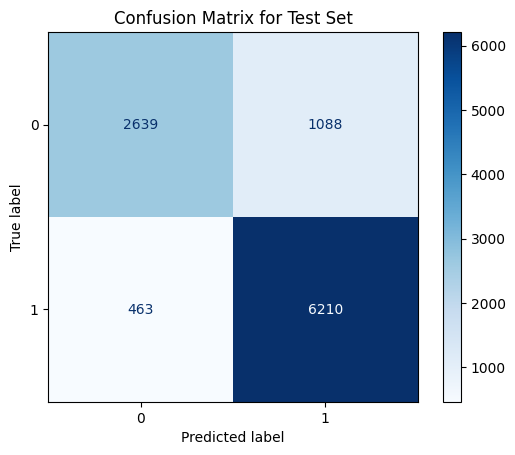


Training Set Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26693
           1       1.00      1.00      1.00     26693

    accuracy                           1.00     53386
   macro avg       1.00      1.00      1.00     53386
weighted avg       1.00      1.00      1.00     53386


Testing Set Evaluation:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77      3727
           1       0.85      0.93      0.89      6673

    accuracy                           0.85     10400
   macro avg       0.85      0.82      0.83     10400
weighted avg       0.85      0.85      0.85     10400



In [35]:
import os
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define the parameters file
params_file = 'best_params.json'

# Check if the parameters file exists
if os.path.exists(params_file) and os.path.getsize(params_file) > 0:  # Ensure file is not empty
    try:
        # Load existing parameters
        with open(params_file, 'r') as file:
            saved_params = json.load(file)
            rf_best_params = saved_params.get('RandomForest1', None)
        print("Loaded Parameters:", rf_best_params)
    except json.JSONDecodeError:
        print("Warning: Parameters file contains invalid JSON. Reinitializing.")
        saved_params = {}
        rf_best_params = None
else:
    saved_params = {}
    rf_best_params = None

# Perform grid search if parameters are not available
if not rf_best_params:
    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )

    # Perform the grid search
    grid_search.fit(X_train_balanced, y_train_balanced)

    # Get the best parameters
    rf_best_params = grid_search.best_params_
    print("Best Parameters Found:", rf_best_params)

    saved_params['RandomForest1'] = rf_best_params

    # Save the updated parameters 
    with open(params_file, 'w') as file:
        json.dump(saved_params, file, indent=4)

# Train model
rf_model = RandomForestClassifier(**rf_best_params, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Evaluate model 
y_train_pred = rf_model.predict(X_train_balanced)
y_test_pred = rf_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Test Set")
plt.show()

rf_test_report1 = classification_report(y_test, y_test_pred, output_dict=True)
rf_results1 = {
    'accuracy': round(rf_test_report1['accuracy'], 4),
    'precision': round(rf_test_report1['weighted avg']['precision'], 4),
    'recall': round(rf_test_report1['weighted avg']['recall'], 4),
    'f1_score': round(rf_test_report1['weighted avg']['f1-score'], 4),
}

# Print classification reports
print("\nTraining Set Evaluation:\n", classification_report(y_train_balanced, y_train_pred))
print("\nTesting Set Evaluation:\n", classification_report(y_test, y_test_pred))


In [36]:
feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                            Feature  Importance
5                      Credit_Score    0.216815
10            Loan_Amount_Requested    0.177376
3                     Annual_Income    0.117408
1                               Age    0.051984
7        Total_Existing_Loan_Amount    0.039751
8                  Outstanding_Debt    0.039703
4                  Monthly_Expenses    0.038991
12                    Interest_Rate    0.038581
11                        Loan_Term    0.037320
14             Bank_Account_History    0.022699
26               City/Town_Suburban    0.020059
15           Marital_Status_Married    0.017384
24           Residential_Status_Own    0.014358
2                        Dependents    0.013950
16            Marital_Status_Single    0.013229
25          Residential_Status_Rent    0.012219
6                    Existing_Loans    0.011913
29            Loan_Purpose_Personal    0.010822
27                  City/Town_Urban    0.010732
30             Loan_Purpose_Vehicle    0

<h3> Decision Tree - with all columns</h3>

Loaded Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


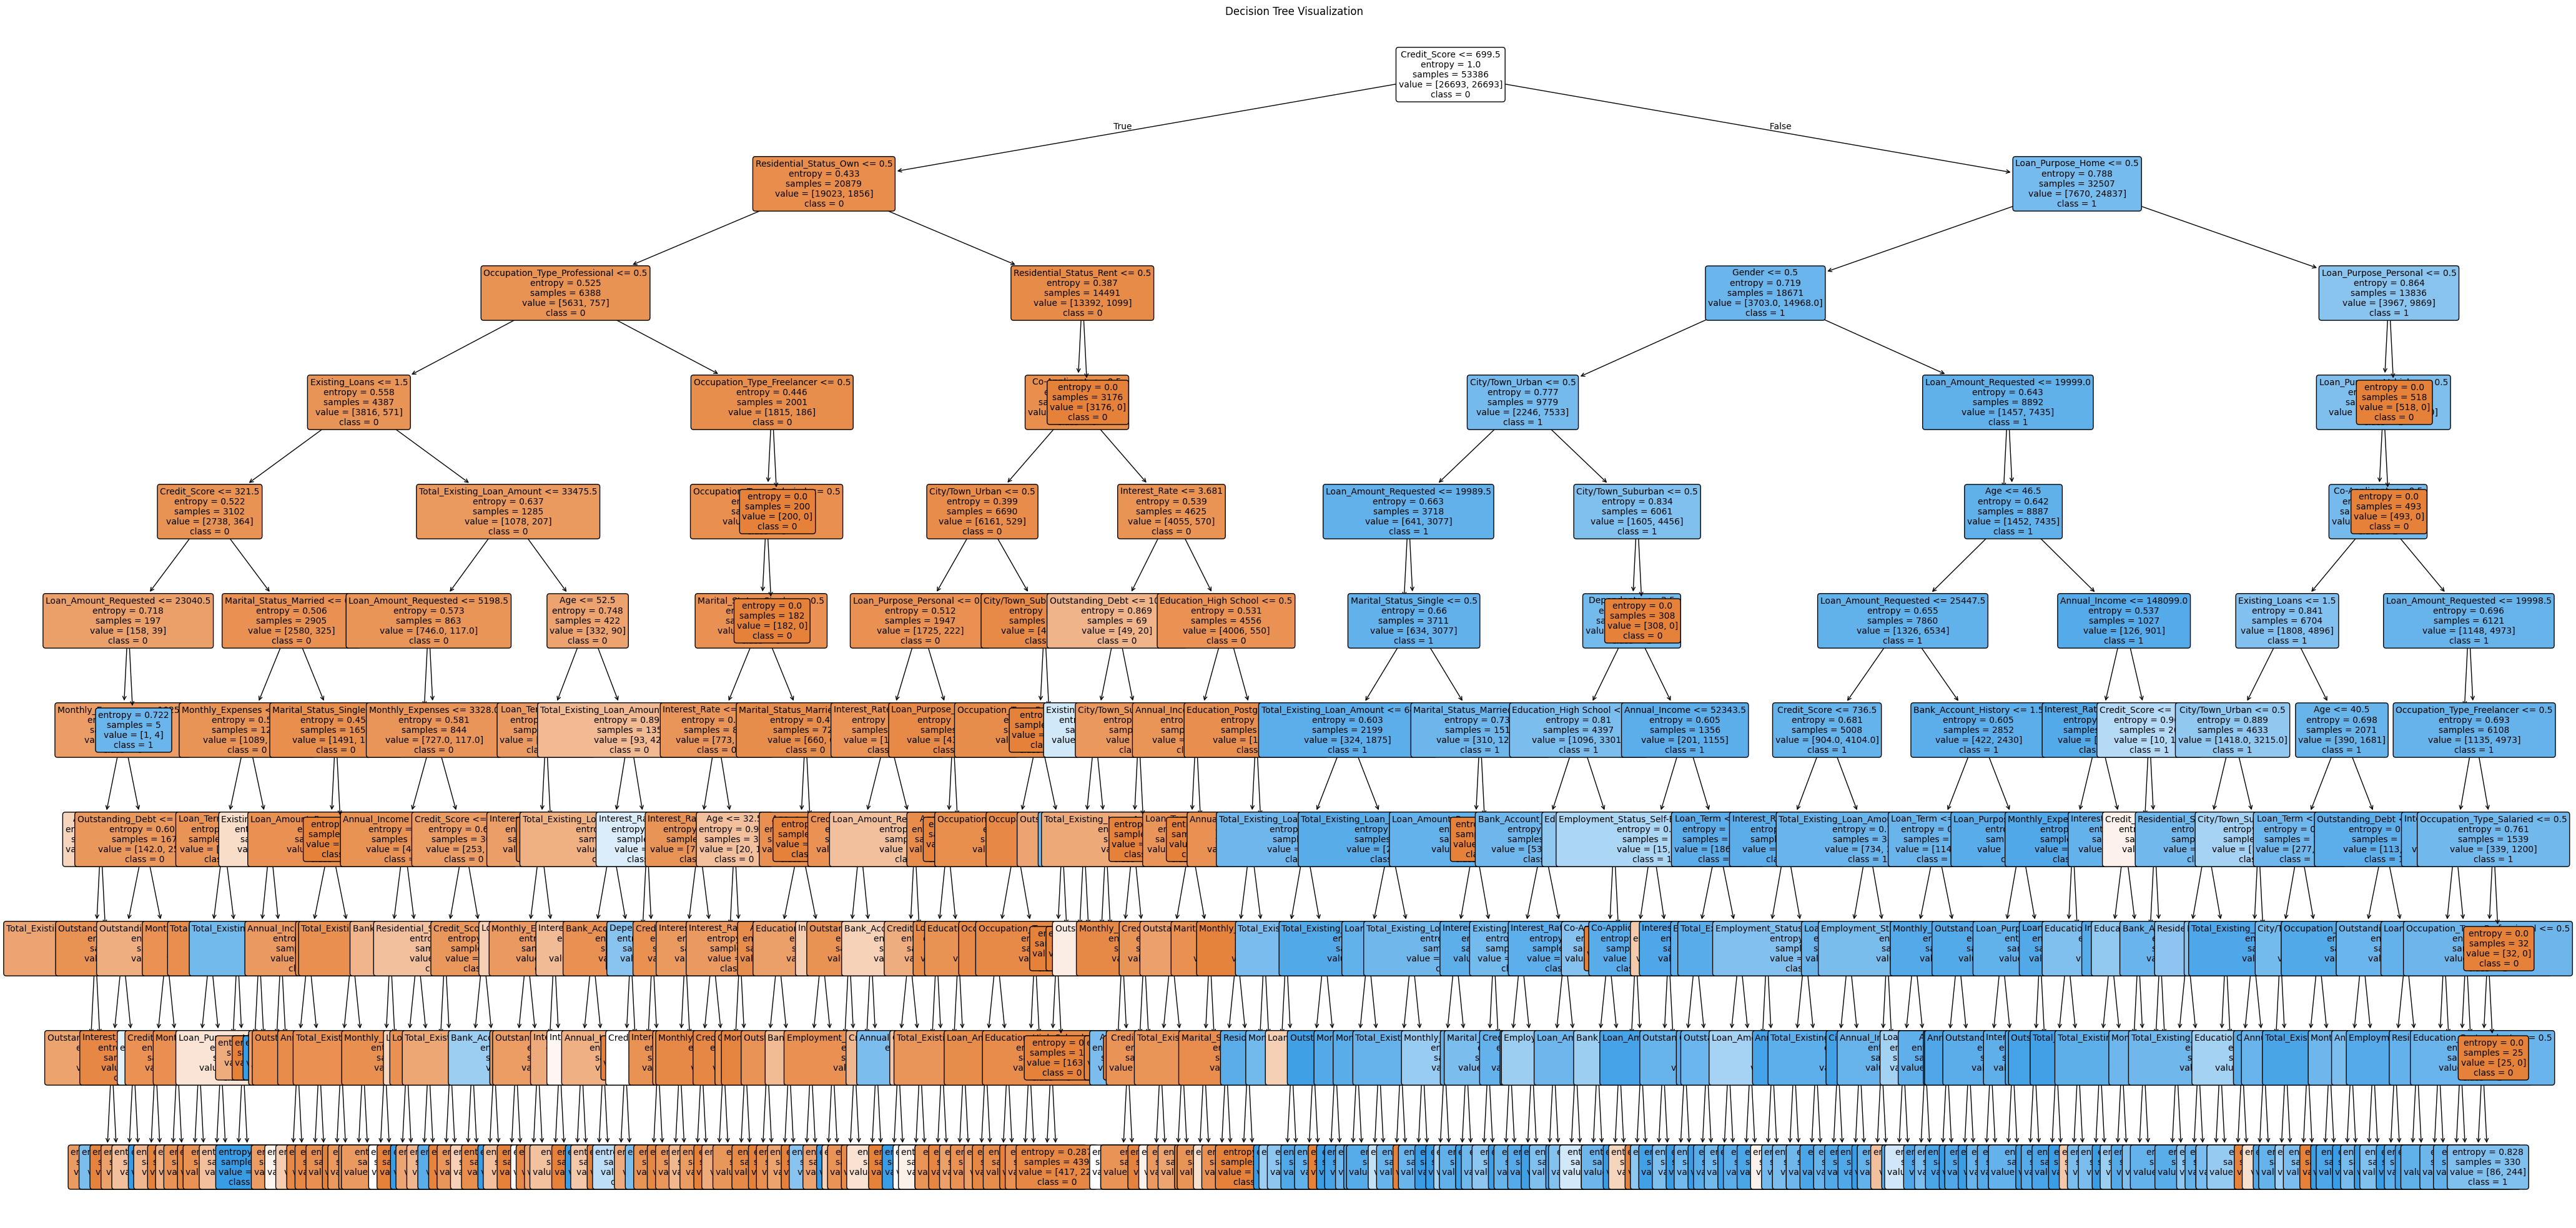

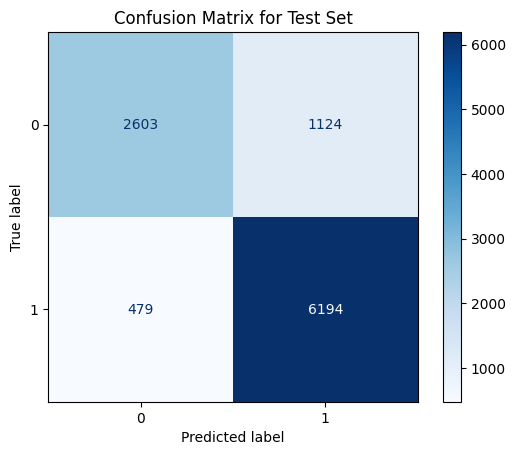


Training Set Evaluation:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     26693
           1       0.81      0.93      0.87     26693

    accuracy                           0.86     53386
   macro avg       0.87      0.86      0.86     53386
weighted avg       0.87      0.86      0.86     53386


Testing Set Evaluation:
               precision    recall  f1-score   support

           0       0.84      0.70      0.76      3727
           1       0.85      0.93      0.89      6673

    accuracy                           0.85     10400
   macro avg       0.85      0.81      0.83     10400
weighted avg       0.85      0.85      0.84     10400



In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define the parameters file
params_file = 'best_params.json'

# Check if the parameters file exists
if os.path.exists(params_file) and os.path.getsize(params_file) > 0:
    try:
        # Load existing parameters
        with open(params_file, 'r') as file:
            saved_params = json.load(file)
            dt_best_params = saved_params.get('DecisionTree1', None)
        print("Loaded Parameters:", dt_best_params)
    except json.JSONDecodeError:
        print("Warning: Parameters file contains invalid JSON. Reinitializing.")
        saved_params = {}
        dt_best_params = None
else:
    saved_params = {}
    dt_best_params = None

# Perform grid search if parameters are not available
if not dt_best_params:
    # Define the parameter grid
    param_grid = {
        'criterion': ['gini', 'entropy', 'log_loss'],  
        'max_depth': [None, 5, 10, 20, 30],           
        'min_samples_split': [2, 5, 10],              
        'min_samples_leaf': [1, 2, 4],               
        'max_features': [None, 'sqrt', 'log2'],      
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=42),
        param_grid=param_grid,
        cv=5,  
        scoring='accuracy', 
        verbose=2,
        n_jobs=-1  
    )

    # Perform the grid search
    grid_search.fit(X_train_balanced, y_train_balanced)

    # Get the best parameters
    dt_best_params = grid_search.best_params_
    print("Best Parameters Found:", dt_best_params)

    saved_params['DecisionTree1'] = dt_best_params

    # Save the updated parameters
    with open(params_file, 'w') as file:
        json.dump(saved_params, file, indent=4)

# Train model 
dt_model = DecisionTreeClassifier(**dt_best_params, random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

# Evaluate model 
y_train_pred = dt_model.predict(X_train_balanced)
y_test_pred = dt_model.predict(X_test)

# Plot the decision tree
plt.figure(figsize=(50, 25))  
plot_tree(
    dt_model,
    feature_names=X_train_balanced.columns,
    class_names=dt_model.classes_.astype(str),  
    filled=True,  
    rounded=True,  
    fontsize=10  
)
plt.title("Decision Tree Visualization")
plt.show()

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Test Set")
plt.show()

dt_test_report1 = classification_report(y_test, y_test_pred, output_dict=True)
dt_results1 = {
    'accuracy': round(dt_test_report1['accuracy'], 4),
    'precision': round(dt_test_report1['weighted avg']['precision'], 4),
    'recall': round(dt_test_report1['weighted avg']['recall'], 4),
    'f1_score': round(dt_test_report1['weighted avg']['f1-score'], 4),
}

# Print classification reports
print("\nTraining Set Evaluation:\n", classification_report(y_train_balanced, y_train_pred))
print("\nTesting Set Evaluation:\n", classification_report(y_test, y_test_pred))


In [38]:
feature_importances = dt_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                            Feature  Importance
5                      Credit_Score    0.731492
26               City/Town_Suburban    0.047237
30             Loan_Purpose_Vehicle    0.041696
29            Loan_Purpose_Personal    0.039049
25          Residential_Status_Rent    0.016984
18           Education_Postgraduate    0.010643
28                Loan_Purpose_Home    0.009960
27                  City/Town_Urban    0.008652
12                    Interest_Rate    0.007016
15           Marital_Status_Married    0.006556
24           Residential_Status_Own    0.006440
7        Total_Existing_Loan_Amount    0.006407
13                     Co-Applicant    0.006210
10            Loan_Amount_Requested    0.005807
23         Occupation_Type_Salaried    0.005413
1                               Age    0.005010
4                  Monthly_Expenses    0.004974
8                  Outstanding_Debt    0.004733
17            Education_High School    0.004261
6                    Existing_Loans    0

<h3> K-Nearest Neighbors (KNN) - with all columns</h3>

Loaded Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


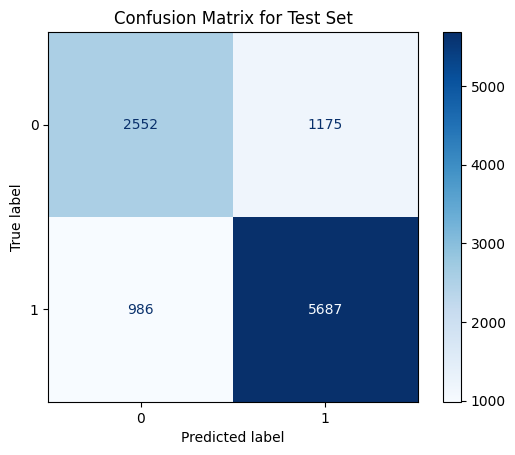

Training Set Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26693
           1       1.00      1.00      1.00     26693

    accuracy                           1.00     53386
   macro avg       1.00      1.00      1.00     53386
weighted avg       1.00      1.00      1.00     53386


Testing Set Evaluation:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70      3727
           1       0.83      0.85      0.84      6673

    accuracy                           0.79     10400
   macro avg       0.78      0.77      0.77     10400
weighted avg       0.79      0.79      0.79     10400



In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameters file
params_file = 'best_params.json'

# Check if the parameters file exists
if os.path.exists(params_file) and os.path.getsize(params_file) > 0:
    try:
        # Load existing parameters
        with open(params_file, 'r') as file:
            saved_params = json.load(file)
            knn_best_params = saved_params.get('KNN1', None)
        print("Loaded Parameters:", knn_best_params)
    except json.JSONDecodeError:
        print("Warning: Parameters file contains invalid JSON. Reinitializing.")
        saved_params = {}
        knn_best_params = None
else:
    saved_params = {}
    knn_best_params = None

# Perform grid search if parameters are not available
if not knn_best_params:
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_neighbors': range(1, 31),  
        'weights': ['uniform', 'distance'],  
        'metric': ['euclidean', 'manhattan', 'minkowski'],  
        'p': [1, 2]  
    }

    # Initialize GridSearchCV 
    grid_search = GridSearchCV(
        estimator=KNeighborsClassifier(),  
        param_grid=param_grid,  
        cv=5,  
        scoring='accuracy', 
        verbose=2,  
        n_jobs=-1  
    )

    # Perform the grid search
    grid_search.fit(X_train_balanced, y_train_balanced)

    # Get the best parameters found by GridSearchCV
    knn_best_params = grid_search.best_params_
    print(f"Best Parameters Found: {knn_best_params}")

    saved_params['KNN1'] = knn_best_params

    # Save the updated parameters 
    with open(params_file, 'w') as file:
        json.dump(saved_params, file, indent=4)

# Train model 
knn_model = KNeighborsClassifier(**knn_best_params)
knn_model.fit(X_train_balanced, y_train_balanced)

# Evaluate model 
y_train_pred = knn_model.predict(X_train_balanced)
y_test_pred = knn_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Test Set")
plt.show()

knn_test_report1 = classification_report(y_test, y_test_pred, output_dict=True)
knn_results1 = {
    'accuracy': round(knn_test_report1['accuracy'], 4),
    'precision': round(knn_test_report1['weighted avg']['precision'], 4),
    'recall': round(knn_test_report1['weighted avg']['recall'], 4),
    'f1_score': round(knn_test_report1['weighted avg']['f1-score'], 4),
}

# Print classification reports
print("Training Set Evaluation:\n", classification_report(y_train_balanced, y_train_pred))
print("\nTesting Set Evaluation:\n", classification_report(y_test, y_test_pred))


<h2> 6.5 Models After Feature Selection </h2>

By running model with all columns, we know the accuracy of the models is around 85% for both Random Forest and Decision Tree, and KNN is around 79%. Hence, now we drop the columns mentioned in Section 5.5 (Feature Selection) to see the results of models after reducing unimportant columns chosen. 
However, to maintain the highest possible accuracy and at the same time reduce models' complexity, we retain marital status, employment status, and city/town. This is because these retained columns showed correlation in the top 10 features heatmap before and were identified as important features in the Random Forest model's feature importance analysis. Additionally, "Gender", "Loan_History" and "Co-Applicant" columns are dropped due to its low feature importance in both the Random Forest and Decision Tree models.

In [40]:
feature_columns2 = [
    'Bank_Account_History', 'Education_High School', 'Education_Postgraduate', 
    'Occupation_Type_Freelancer', 'Occupation_Type_Professional', 'Occupation_Type_Salaried', 
    'Residential_Status_Own', 'Residential_Status_Rent', 'Loan_Purpose_Home', 'Loan_Purpose_Personal', 'Loan_Purpose_Vehicle',
    'Gender', 'Loan_History', 'Co-Applicant'
]

X_train_balanced = pd.DataFrame(X_train_balanced, columns=X_train.columns)

X_train_balanced_final = X_train_balanced.drop(feature_columns2, axis=1)


In [41]:
print(X_train_balanced_final.columns)

Index(['Age', 'Dependents', 'Annual_Income', 'Monthly_Expenses',
       'Credit_Score', 'Existing_Loans', 'Total_Existing_Loan_Amount',
       'Outstanding_Debt', 'Loan_Amount_Requested', 'Loan_Term',
       'Interest_Rate', 'Marital_Status_Married', 'Marital_Status_Single',
       'Employment_Status_Self-Employed', 'Employment_Status_Unemployed',
       'City/Town_Suburban', 'City/Town_Urban'],
      dtype='object')


In [42]:
# save to a new csv file 
X_train_balanced_final.to_csv('cleaned_data.csv')

In [43]:
X_test_final = X_test.drop(columns=feature_columns2, axis=1)

<h3> Random Forest - After Feature Selection</h3>

Loaded Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


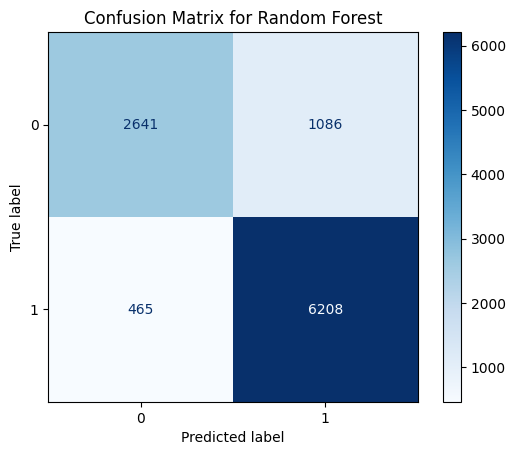

Training Set Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26693
           1       1.00      1.00      1.00     26693

    accuracy                           1.00     53386
   macro avg       1.00      1.00      1.00     53386
weighted avg       1.00      1.00      1.00     53386


Testing Set Evaluation:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77      3727
           1       0.85      0.93      0.89      6673

    accuracy                           0.85     10400
   macro avg       0.85      0.82      0.83     10400
weighted avg       0.85      0.85      0.85     10400



In [44]:
# Define the parameters file
params_file = 'best_params.json'

# Check if the parameters file exists 
if os.path.exists(params_file) and os.path.getsize(params_file) > 0:  # Ensure file is not empty
    try:
        # Load existing parameters 
        with open(params_file, 'r') as file:
            saved_params = json.load(file)
            rf_best_params = saved_params.get('RandomForest2', None)
        print("Loaded Parameters:", rf_best_params)
    except json.JSONDecodeError:
        print("Warning: Parameters file contains invalid JSON. Reinitializing.")
        saved_params = {}
        rf_best_params = None
else:
    saved_params = {}
    rf_best_params = None
    
# Perform grid search if parameters are not available
if not rf_best_params:
    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    }

    # Initialize and perform GridSearchCV
    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )
    grid_search.fit(X_train_balanced_final, y_train_balanced)

    # Get and store the best parameters
    rf_best_params = grid_search.best_params_
    print(f"Best Parameters Found:", rf_best_params)

    # Save the best parameters 
    saved_params['RandomForest2'] = rf_best_params
    
    with open(params_file, 'w') as file:
        json.dump(saved_params, file, indent=4)

# Train model
rf_model = RandomForestClassifier(**rf_best_params, random_state=42)
rf_model.fit(X_train_balanced_final, y_train_balanced)

# Evaluate model
y_train_pred = rf_model.predict(X_train_balanced_final)
y_test_pred = rf_model.predict(X_test_final)

#Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f"Confusion Matrix for Random Forest")
plt.show()

rf_test_report2 = classification_report(y_test, y_test_pred, output_dict=True)
rf_results2 = {
    'accuracy': round(rf_test_report2['accuracy'], 4),
    'precision': round(rf_test_report2['weighted avg']['precision'], 4),
    'recall': round(rf_test_report2['weighted avg']['recall'], 4),
    'f1_score': round(rf_test_report2['weighted avg']['f1-score'], 4),
}

print(f"Training Set Evaluation:\n", classification_report(y_train_balanced, y_train_pred))
print(f"\nTesting Set Evaluation:\n", classification_report(y_test, y_test_pred))

<h3> Decision Tree - After Feature Selection</h3>

Loaded Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


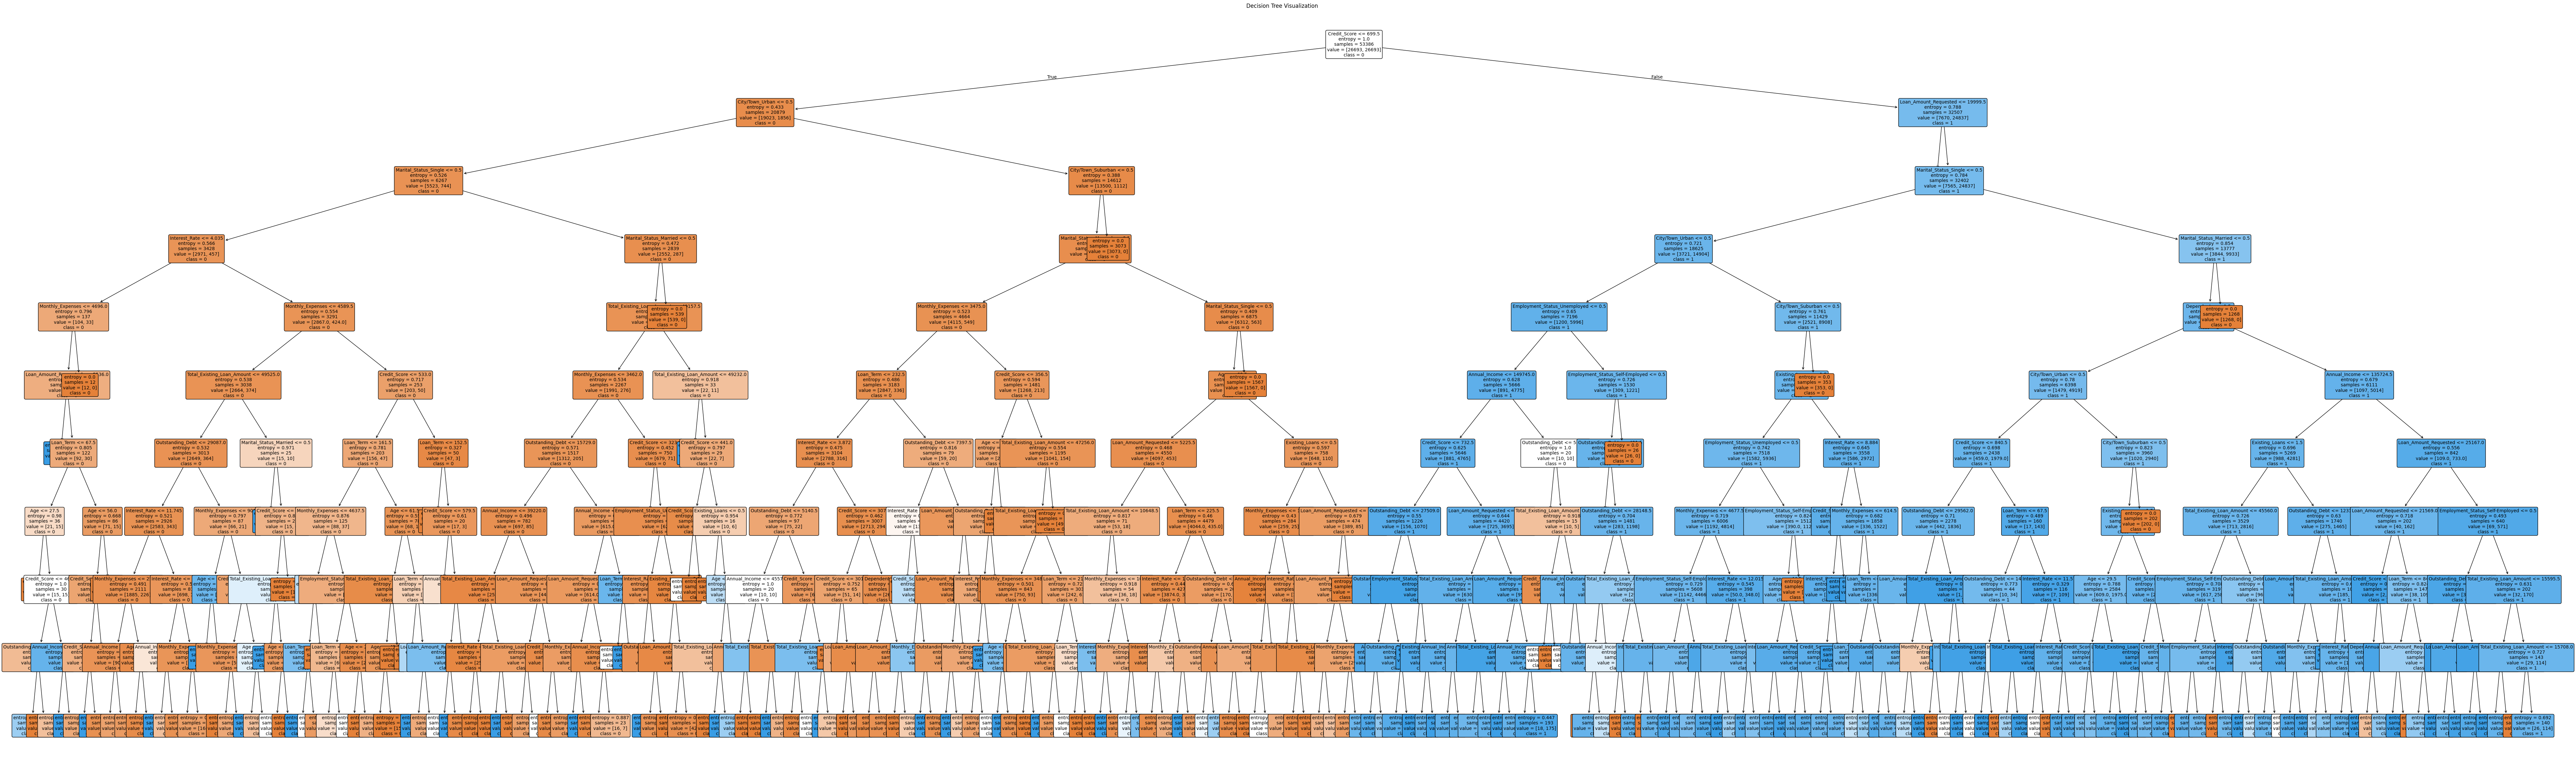

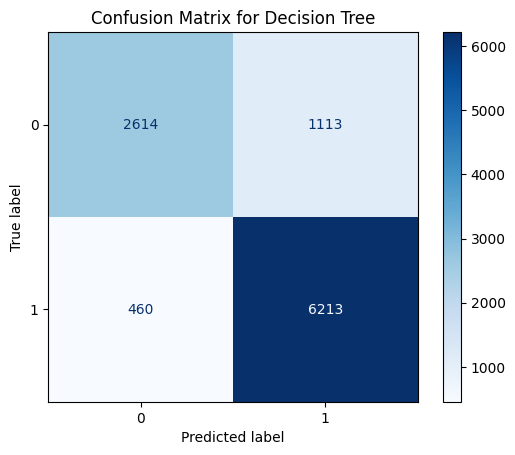

Training Set Evaluation:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     26693
           1       0.82      0.94      0.87     26693

    accuracy                           0.86     53386
   macro avg       0.87      0.86      0.86     53386
weighted avg       0.87      0.86      0.86     53386


Testing Set Evaluation:
               precision    recall  f1-score   support

           0       0.85      0.70      0.77      3727
           1       0.85      0.93      0.89      6673

    accuracy                           0.85     10400
   macro avg       0.85      0.82      0.83     10400
weighted avg       0.85      0.85      0.85     10400



In [45]:
# Define the parameters file
params_file = 'best_params.json'

# Check if the parameters file exists 
if os.path.exists(params_file) and os.path.getsize(params_file) > 0:
    try:
        # Load existing parameters
        with open(params_file, 'r') as file:
            saved_params = json.load(file)
            dt_best_params = saved_params.get('DecisionTree2', None)
        print("Loaded Parameters:", dt_best_params)
    except json.JSONDecodeError:
        print("Warning: Parameters file contains invalid JSON. Reinitializing.")
        saved_params = {}
        dt_best_params = None
else:
    saved_params = {}
    dt_best_params = None

# Perform grid search if parameters are not available
if not dt_best_params:
    # Define the parameter grid
    param_grid = {
        'criterion': ['gini', 'entropy', 'log_loss'],  
        'max_depth': [None, 5, 10, 20, 30],           
        'min_samples_split': [2, 5, 10],              
        'min_samples_leaf': [1, 2, 4],               
        'max_features': [None, 'sqrt', 'log2'],      
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=42),
        param_grid=param_grid,
        cv=5,  
        scoring='accuracy',  
        verbose=2,
        n_jobs=-1  
    )

    # Perform the grid search
    grid_search.fit(X_train_balanced_final, y_train_balanced)

    # Get the best parameters
    dt_best_params = grid_search.best_params_
    print("Best Parameters Found:", dt_best_params)

    saved_params['DecisionTree2'] = dt_best_params

    # Save the updated parameters
    with open(params_file, 'w') as file:
        json.dump(saved_params, file, indent=4)
        
# Train model
dt_model = DecisionTreeClassifier(**dt_best_params, random_state=42)
dt_model.fit(X_train_balanced_final, y_train_balanced)

# Evaluate model 
y_train_pred = dt_model.predict(X_train_balanced_final)
y_test_pred = dt_model.predict(X_test_final)

# Plot the decision tree
plt.figure(figsize=(100, 30)) 
plot_tree(
    dt_model,
    feature_names=X_train_balanced_final.columns, 
    class_names=dt_model.classes_.astype(str),  
    filled=True,  
    rounded=True, 
    fontsize=10  
)
plt.title("Decision Tree Visualization")
plt.show()

cm = confusion_matrix(y_test, y_test_pred)

# Generate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f"Confusion Matrix for Decision Tree")
plt.show()

dt_test_report2 = classification_report(y_test, y_test_pred, output_dict=True)
dt_results2 = {
    'accuracy': round(dt_test_report2['accuracy'], 4),
    'precision': round(dt_test_report2['weighted avg']['precision'], 4),
    'recall': round(dt_test_report2['weighted avg']['recall'], 4),
    'f1_score': round(dt_test_report2['weighted avg']['f1-score'], 4),
}

print("Training Set Evaluation:\n", classification_report(y_train_balanced, y_train_pred))
print("\nTesting Set Evaluation:\n", classification_report(y_test, y_test_pred))

<h3> KNN - After Feature Selection </h3>

Loaded Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


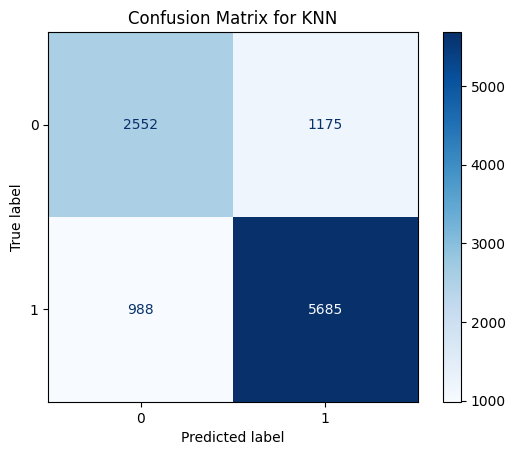

Training Set Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26693
           1       1.00      1.00      1.00     26693

    accuracy                           1.00     53386
   macro avg       1.00      1.00      1.00     53386
weighted avg       1.00      1.00      1.00     53386


Testing Set Evaluation:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70      3727
           1       0.83      0.85      0.84      6673

    accuracy                           0.79     10400
   macro avg       0.77      0.77      0.77     10400
weighted avg       0.79      0.79      0.79     10400



In [46]:
# Define the parameters file
params_file = 'best_params.json'

# Check if the parameters file exists
if os.path.exists(params_file) and os.path.getsize(params_file) > 0:
    try:
        # Load existing parameters
        with open(params_file, 'r') as file:
            saved_params = json.load(file)
            knn_best_params = saved_params.get('KNN2', None)
        print("Loaded Parameters:", knn_best_params)
    except json.JSONDecodeError:
        print("Warning: Parameters file contains invalid JSON. Reinitializing.")
        saved_params = {}
        knn_best_params = None
else:
    saved_params = {}
    knn_best_params = None

# Perform grid search if parameters are not available
if not knn_best_params:
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_neighbors': range(1, 31),  
        'weights': ['uniform', 'distance'],  
        'metric': ['euclidean', 'manhattan', 'minkowski'], 
        'p': [1, 2]  
    }

    # Initialize GridSearchCV 
    grid_search = GridSearchCV(
        estimator=KNeighborsClassifier(),  
        param_grid=param_grid,  
        cv=5, 
        scoring='accuracy', 
        verbose=2,  
        n_jobs=-1  
    )

    # Perform the grid search
    grid_search.fit(X_train_balanced_final, y_train_balanced)

    # Get the best parameters found by GridSearchCV
    knn_best_params = grid_search.best_params_
    print(f"Best Parameters Found: {knn_best_params}")

    saved_params['KNN2'] = knn_best_params

    # Save the updated parameters
    with open(params_file, 'w') as file:
        json.dump(saved_params, file, indent=4)

# Train model 
knn_model = KNeighborsClassifier(**knn_best_params)
knn_model.fit(X_train_balanced_final, y_train_balanced)

# Evaluate model 
y_train_pred = knn_model.predict(X_train_balanced_final)
y_test_pred = knn_model.predict(X_test_final)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f"Confusion Matrix for KNN")
plt.show()

knn_test_report2 = classification_report(y_test, y_test_pred, output_dict=True)
knn_results2 = {
    'accuracy': round(knn_test_report2['accuracy'], 4),
    'precision': round(knn_test_report2['weighted avg']['precision'], 4),
    'recall': round(knn_test_report2['weighted avg']['recall'], 4),
    'f1_score': round(knn_test_report2['weighted avg']['f1-score'], 4),
}

print("Training Set Evaluation:\n", classification_report(y_train_balanced, y_train_pred))
print("\nTesting Set Evaluation:\n", classification_report(y_test, y_test_pred))

<h3> Comparison Table </h3>

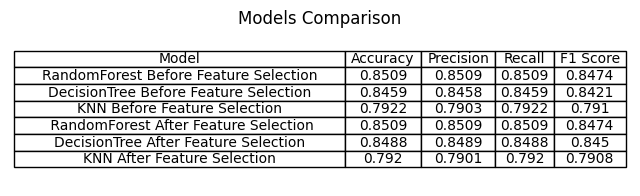

In [47]:
comparison_df = pd.DataFrame({
    'Model': ['RandomForest Before Feature Selection', 'DecisionTree Before Feature Selection', 'KNN Before Feature Selection',' RandomForest After Feature Selection', 'DecisionTree After Feature Selection', 'KNN After Feature Selection'],
    'Accuracy': [rf_results1['accuracy'], dt_results1['accuracy'], knn_results1['accuracy'], rf_results2['accuracy'], dt_results2['accuracy'], knn_results2['accuracy']],
    'Precision': [rf_results1['precision'], dt_results1['precision'], knn_results1['precision'], rf_results1['precision'], dt_results2['precision'], knn_results2['precision']],
    'Recall': [rf_results1['recall'], dt_results1['recall'], knn_results1['recall'], rf_results2['recall'], dt_results2['recall'], knn_results2['recall']],
    'F1 Score': [rf_results1['f1_score'], dt_results1['f1_score'], knn_results1['f1_score'], rf_results2['f1_score'], dt_results2['f1_score'], knn_results2['f1_score']],
})

# Plot the comparison table
fig, ax = plt.subplots(figsize=(8, 2))  
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=comparison_df.values, colLabels=comparison_df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)  
table.set_fontsize(10)  
table.auto_set_column_width(col=list(range(len(comparison_df.columns))))  

plt.title("Models Comparison")
plt.show()

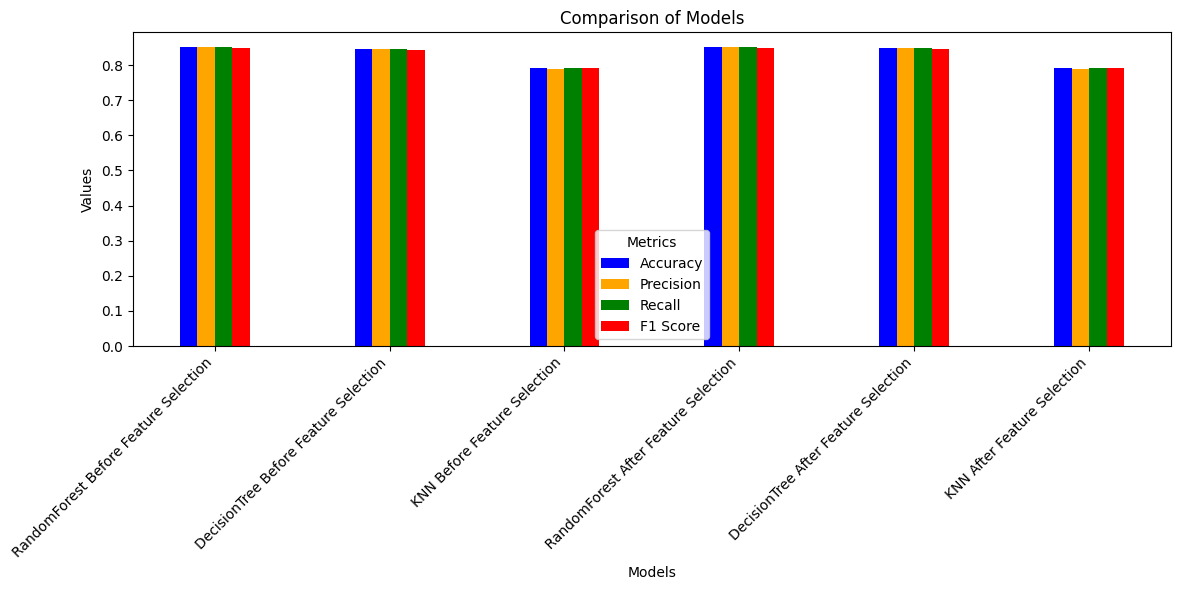

In [48]:
# Bar chart for the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = comparison_df['Model']

num_metrics = len(metrics)
num_models = len(models)
x = np.arange(num_models)  

width = 0.1  
colors = ['blue', 'orange', 'green', 'red'] 

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, comparison_df[metric], width, color=colors[i], label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Comparison of Models')
ax.set_xticks(x + width * (num_metrics / 2 - 0.5))
ax.set_xticklabels(models, rotation=45, ha='right')  
ax.legend(title='Metrics')

plt.tight_layout()
plt.show()

<h3> Save model into pkl files </h3>

In [49]:
import pickle

#Save trained model into pkl file for Streamlit use
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

The original pkl file is too large, hence we split into several parts.

In [50]:
import os

# Path to the original large model file
input_file = 'rf_model.pkl'

# Directory to save the split files
output_dir = 'model_parts'
os.makedirs(output_dir, exist_ok=True)

# Maximum size of each chunk in bytes 
chunk_size = 25 * 1024 * 1024 

# Open the large model file for reading
with open(input_file, 'rb') as f:
    part_number = 1
    while True:
        # Read a chunk of the file
        chunk = f.read(chunk_size)
        if not chunk:
            break  
        
        # Write the chunk to a new part file
        part_file = os.path.join(output_dir, f'part_{part_number}.pkl')
        with open(part_file, 'wb') as part_f:
            part_f.write(chunk)
        
        print(f"Created part: {part_file}")
        part_number += 1


Created part: model_parts\part_1.pkl
Created part: model_parts\part_2.pkl
Created part: model_parts\part_3.pkl
Created part: model_parts\part_4.pkl
Created part: model_parts\part_5.pkl
Created part: model_parts\part_6.pkl
Created part: model_parts\part_7.pkl
Created part: model_parts\part_8.pkl
Created part: model_parts\part_9.pkl
Created part: model_parts\part_10.pkl
Created part: model_parts\part_11.pkl
Created part: model_parts\part_12.pkl
